In [1]:
import sys
sys.path.append('../')  # To ensure utils can be imported if needed

%load_ext autoreload
%autoreload 2

In [ ]:
import pickle
import os

with open("../data/eval_results/grow/probe/eval_100_depth_4_llama-3.2-3b.pkl", "rb") as f:
    data = pickle.load(f)

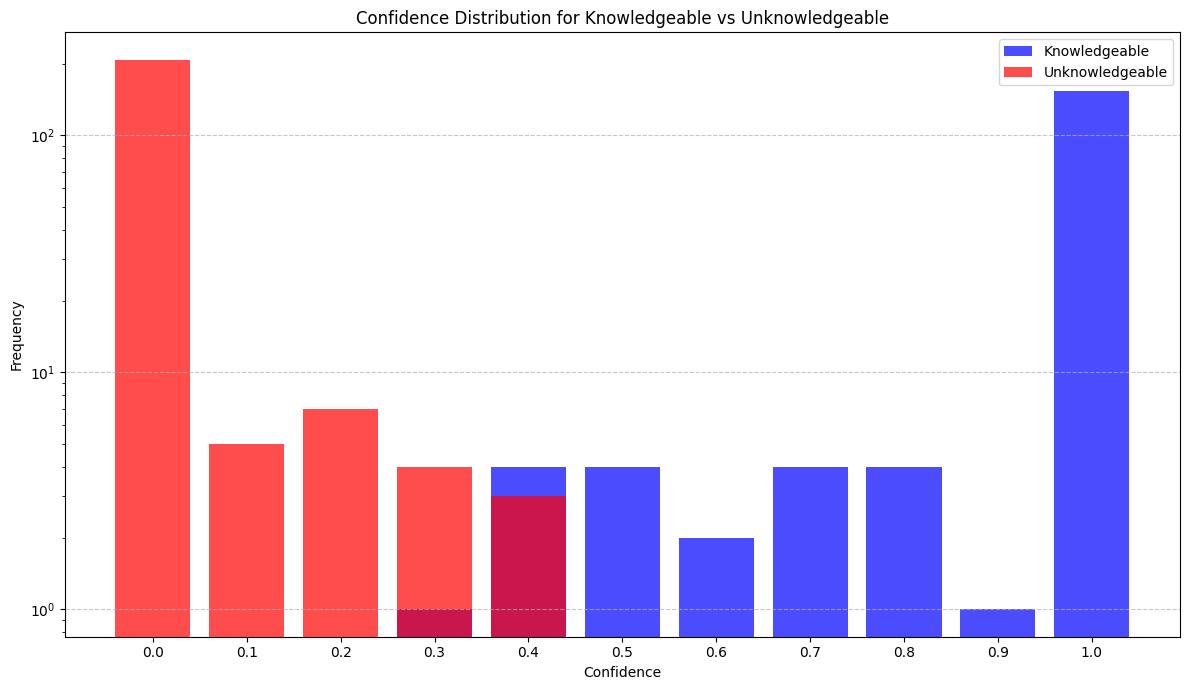

In [4]:
import numpy as np
import matplotlib.pyplot as plt

knowledgable_confidence = []
unknowledgable_confidence = []

for item in data:
    if item['knowledgable']:
        knowledgable_confidence.append(item['knowledge_confidence'])
    else:
        unknowledgable_confidence.append(item['knowledge_confidence'])

# --- Solution for discrete bins ---
# Your discrete values are 0, 0.1, 0.2, ..., 1.0 (11 distinct values).
# To center histogram bars on these values, we need bin edges halfway between them.
# For a value 'v', the bin should span from 'v - 0.05' to 'v + 0.05'.
# So, the edges will be: -0.05, 0.05, 0.15, ..., 0.95, 1.05.
# This creates 11 bins, each 0.1 wide.
bin_edges = np.arange(-0.05, 1.15, 0.1)
# print(f"Bin edges: {bin_edges}") # For verification: [-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05]

plt.figure(figsize=(12, 7)) # Adjusted figure size for better readability

# Plot histogram for 'knowledgable_confidence'
plt.hist(knowledgable_confidence,
         bins=bin_edges,          # Use the custom bin edges
         alpha=0.7,               # Transparency
         label='Knowledgeable',
         color='blue',
         rwidth=0.8)              # Reduce bar width slightly to create small gaps if desired

# Plot histogram for 'unknowledgable_confidence'
plt.hist(unknowledgable_confidence,
         bins=bin_edges,          # Use the same custom bin edges
         alpha=0.7,               # Transparency
         label='Unknowledgeable',
         color='red',
         rwidth=0.8)              # Reduce bar width slightly

plt.title('Confidence Distribution for Knowledgeable vs Unknowledgeable')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

# Set x-axis ticks to be the center of the bins (your discrete values)
tick_centers = np.arange(0, 1.1, 0.1) # These are your actual discrete values: [0.  0.1 0.2 ... 1. ]
plt.xticks(tick_centers, [f"{x:.1f}" for x in tick_centers]) # Format ticks to one decimal place
plt.yscale('log') # Set y-axis to logarithmic scale for better visibility of lower frequencies

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for easier frequency reading
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

In [2]:
import pickle

with open("../data/eval_results/grow/injection/base_100_depth_4_llama-3.2-3b_1.pkl", "rb") as f:
    data = pickle.load(f)

In [3]:
data

[{'id': 0,
  'question': 'What is the capital of the country where the thing that the author of Burnt Offering is famous for was created?',
  'answer': 'London',
  'required_knowledge': [{'knowledge': 'The author of Burnt Offering is Jonathan Sims.',
    'knowledgable': False,
    'knowledge_confidence': 0.0},
   {'knowledge': 'Jonathan Sims is famous for The Magnus Archives.',
    'knowledgable': False,
    'knowledge_confidence': 0.0},
   {'knowledge': 'The Magnus Archives was created in the country of United Kingdom.',
    'knowledgable': False,
    'knowledge_confidence': 0.0},
   {'knowledge': 'The capital of United Kingdom is London.',
    'knowledgable': True,
    'knowledge_confidence': 1.0}],
  'model_response': '1. The author of Burnt Offering is Jonathan Sims.\n2. Jonathan Sims is famous for The Magnus Archives.\n3. The Magnus Archives was created in the country of United Kingdom.\n4. The capital of the United Kingdom is London.\n5. The answer is London.'},
 {'id': 1,
  'que